In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data = pd.read_csv('imu_test (1).csv')

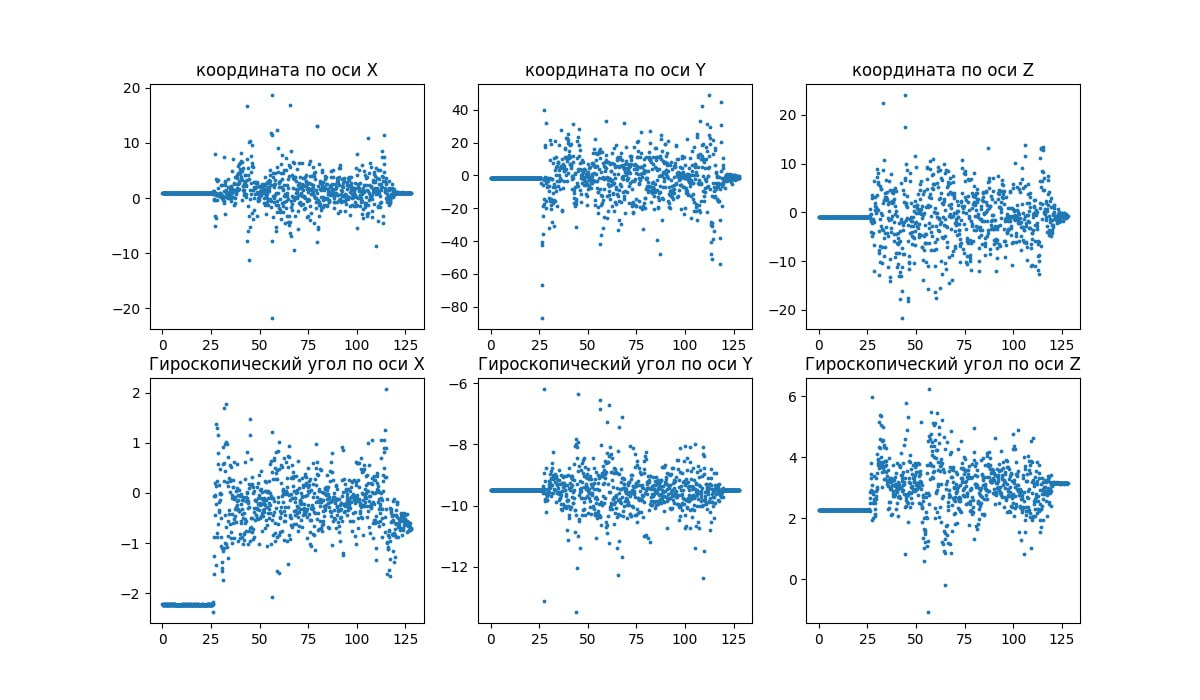

In [ ]:
from IPython.display import Image, display

image_path = "/content/tt.jpg"

display(Image(image_path))

Сначала избавляемся от вибраций на графике, которые появляются в процессе движения (видимо датчик слишком чувствительный даже к малым колебаниям). Для этого создаем функцию 'sred', которая усредняет каждые 100 точек (par = 100) и записывает значение в новый дата сет ставя в соответствие время, соответствующее первой из 100 точек.

In [ ]:
def sred(x,y, par):
    y = y[:len(y) - len(y) % par ]
    return x[:len(x) - par:par], data['ay'].iloc[100*i:100*i+100].mean()

Затем находим зависимости траекторий по осям X, Y и Z, а также величин углов вращения относительно тех же осей от времени. Для этого создаем функцию 'integral', которая дает на выходе зависимость, проинтегрированную по времени. Для получения зависимости траекторий и углов данная функция к исходным зависимостям (после усреднения) прменяется дважды.

In [ ]:
def integral(X,Y):
    iy =[]
    X = np.array(X)
    print(X[2])
    dx = (X[len(X) - 1] - X[0]) / len(X)
    int_sum = 0
    for i, y in enumerate(Y):
      int_sum += y * dx
      iy.append(int_sum)
    return X, iy


Строим графики полученных зависимостей

0.2428499999998621


TypeError: 'numpy.float64' object is not iterable

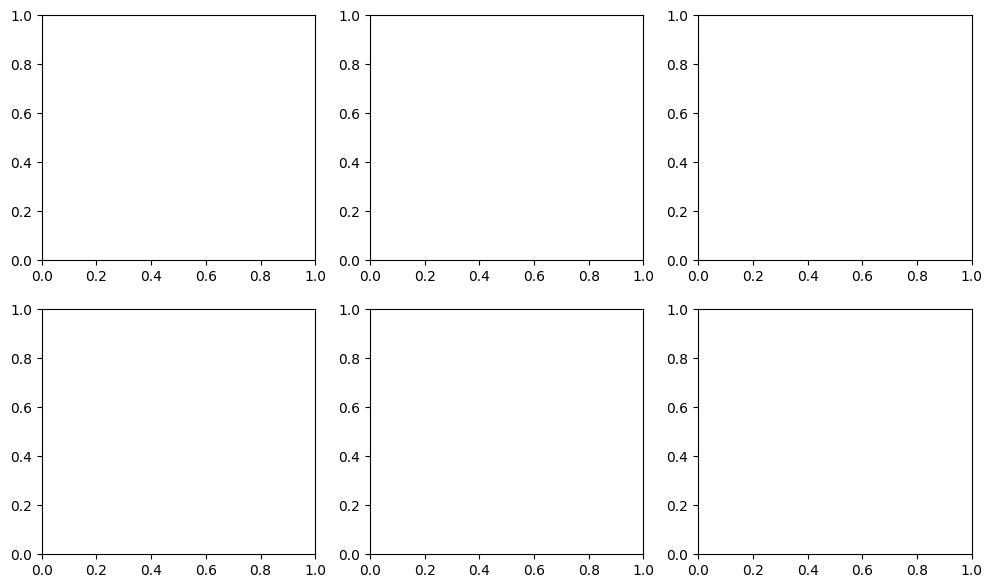

In [ ]:
subplots_titles = ['Ускорение по оси X', 'Ускорение по оси Y', 'Ускорение по оси Z',
                   'Гироскопическая скорость по оси X', 'Гироскопическая скорость по оси Y', 'Гироскопическая скорость по оси Z']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 7))
for i, ax in enumerate(axes.flatten()):
    column_name = data.columns[i + 2]
    t = data['ts']
    d = data[column_name]
    t, d = sred(t, d, 100)
    id = []
    t, id = integral(t, d)
    t, iid = integral(t, id)
    print(len(t), len(d))

    ax.scatter(t, id, s = 3)
    ax.set_title(subplots_titles[i])

plt.tight_layout()
plt.show()

In [ ]:
from IPython.display import Image, display

image_path = "/content/ff.jpg"

display(Image(image_path))

Теперь построим распределения полученных зависимостей. Гистограммы функциий, полученных двойным интегрированием, очень сглажены, в отличии от гистограмм ускорений, поэтому далее для изучения вибраций будем рассматривать именно ускорения.

In [ ]:
from IPython.display import Image, display

image_path = "//content/Screenshot 2024-02-12 at 02.11.08.png"

display(Image(image_path))

Предположим что амплитуды вибраций распределены нормально. Чтобы это проверить - на графиках ускорений от времени найдем пики (максимумы и минимумы) и составим из них новый массив (амплитуд отклонений ускорения от среднего значения).

Затем построим графики распределения (кол-во точек в массиве с данным значением от самого значения)

In [ ]:
fig1, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 7))
AR = []
for ii, ax in enumerate(axes.flatten()):
    #fig = plt.figure(figsize=(7, 4))
    #ax = fig.add_subplot()
    column_name = data.columns[ii + 2]
    t = data['ts']
    d = data[column_name]
    #t,d = sred(t,d,200)

    max_xx = []
    for i in range(5, len(d) - 5):
        h = 0
        for tt in range(5):
            tt = tt + 1
            if (d[i]>=d[i-tt])and(d[i] >= d[i+tt]):
                h = h+1
            elif (d[i]<=d[i+tt])and(d[i] <= d[i-tt]):
                h = h-1
        if abs(h) == 5:
            max_xx.append(d[i])

    d = max_xx
    print('len_max',len(d))

    ax.set_title(subplots_titles[ii])

    ar = ax.hist(d, bins=100)
    AR.append(ar)


array = np.random.randn(100000)
ar = plt.hist(array, bins=1000)
fig2, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 7))


Мы знаем как выглядит нормальное распределение и что его параметры (сигма^2 и мю) являются дисперсией и мат ожиданием исследуемой величины. Чтобы их найти логарифмируем наше распределение, и далее аппроксимируем полученную зависимость квадратичной зависимостью.


In [ ]:
for i, ax in enumerate(axes.flatten()):

    n, amp = ar[0], ar[1][:-1]
    n_, amp_ = AR[i][0], AR[i][1][:-1]
    print(len(n), len(amp))
    #fig = plt.figure(figsize=(7, 4))
    #ax = fig.add_subplot()
    column_name = data.columns[i + 2]
    t = data['ts']
    d = data[column_name]
    n = []
    amp = []
    for iii in range(len(n_)):
        if n_[iii] > 0:
            n.append(n_[iii])
            amp.append(amp_[iii])
        if n_[iii] > 20:
            for j in range(10000):
                n.append(n_[iii])
                amp.append(amp_[iii])
    degree = 2
    coefficients = np.polyfit(amp, np.log(n), degree)
    amp = np.array(amp)
    y_ = coefficients[2] + coefficients[1] * amp + amp**2 * coefficients[0]
    sigma = - 1 / (2 * coefficients[0])
    mu = (2*sigma*(np.log(1/((2*np.pi*sigma)**0.5)) - coefficients[2]))**0.5
    mu = coefficients[1] * sigma
    print('coafficients1 ', coefficients[0], ' ', coefficients[2])
    print('coafficients ', sigma**0.5/9.8, ' ',mu )
    print(i)



    # Визуализация результатов

    ax.scatter(amp, y_, color = 'r', s = 3)
    ax.scatter(amp, np.log(n),color = 'b', s = 3)
    ax.set_title(subplots_titles[i])
    #ax.set_xlabel('Время, сек')
    #ax.set_ylabel('Значение')

    #print(n)

plt.show()

В итоге получаем данные графики

In [ ]:
from IPython.display import Image, display

image_path = "/content/rr.jpg"

display(Image(image_path))

На данных графиках красным цветом показана аппроксимированная кривая, а синим - исходная. Как видно кривые достаточно хорошо совпали ==> амплитуды вибраций ускорений, а значит и координат действительно имеею нормальное распределение.

При этом из полученных при аппроксимации коэффициентов, зная вид нормального распределения и его логарифма, получаем искомые параметры распределения.

Средние амплитуды ускорений в единицах ускорения свободного падения 'g' (среднеквадратичное отклонение)

a_x = 1.35g

a_y = 0.6g

a_z = 0.44g

Мат ожидание примерно = 0

# Вердикт такой:
Робот ехал равноускоренно, причем его путь был разбит на три участка (см нижний левый график). Возможно он с поворотом заезжал на горку. причем на 2-ом участке появились вибрации (строгая корреляция). Возможно из-за того что пол не ровный, возможно из-за того, что на этом участке начал работать какой-то механизм для подъема/поворота/еще чего-нибудь. Некоторые параметры вибраций можно установить из гистограмм (см выше)

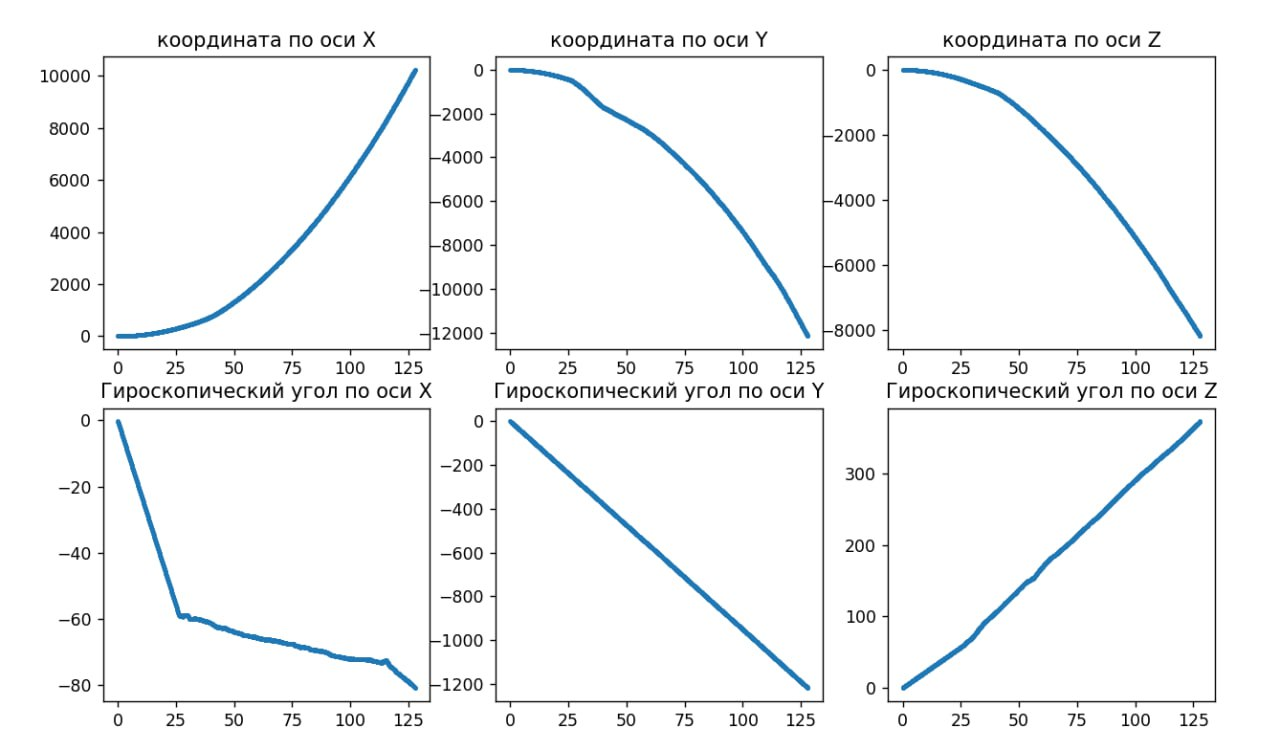

In [ ]:
from IPython.display import Image, display

image_path = "/content/ff.jpg"

display(Image(image_path))